# [Dacon School] 1주차 숙제
- 1. 필요한 라이브러리 로드
- 2. train, park, day_care_center 데이터 DataFrame 형태로 로드
- 3. park 와 day_care_center 의 데이터 타입, null의 개수, 불러온 DataFrame의 크기를 간단히 볼 수 있도록 함수를 통해 출력해보기
- 4. park 와 day_care_center 의 통계수치를 간단히 볼 수 있도록 함수를 통해 출력해보기
- 5. day_care_center 데이터에서 컬럼 'gu'(구) 별로 수치형 컬럼들의 평균값을 데이터 프레임 형태로 나타내보기
- 6. park 데이터에서 컬럼 'dong'(동) 별로 수치형 컬럼들의 평균값을 데이터 프레임 형태로 나타내보기
- 7. day_care_center 데이터와 park 데이터 결합
        - day_care_center에서 gu별로 day_care_baby_num의 평균값을 저장합니다.  
                    Ex) 강남구 : 52.040359
                        강동구 : 48.816186
                              ...
                        해운대구 : 45.847534
        - park데이터에 새로운 컬럼인 day_care_baby_mean을 만든 후 저장한 gu별 day_care_baby_num의 평균값을 넣습니다. (loc 사용하면 편리)
        - 즉, park 데이터에서 구가 강남구인 것은 52.040359 값을 넣고 해운대구 인 것은 45.848534를 나머지도 동일하게 넣으면 됩니다.

#### 필요한 라이브러리로드

In [135]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Hancom Gothic'

#### train, park, day_care_center 데이터 DataFrame 형태로 로드

In [136]:
train = pd.read_csv('train.csv')
day_care_center = pd.read_csv('day_care_center.csv')
park=pd.read_csv('park.csv')

#### park 와 day_care_center 의 데이터 타입, null의 개수, 불러온 DataFrame의 크기를 간단히 볼 수 있도록 함수를 통해 출력해보기

In [28]:
# park
park.info()
park.isnull().sum()
park.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

(1359, 13)

In [29]:
# day_care_center
day_care_center.info()
day_care_center.isnull().sum()
day_care_center.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


(7551, 11)

#### park 와 day_care_center 의 통계수치를 간단히 볼 수 있도록 함수를 통해 출력해보기

In [30]:
park.describe()

,park_area,park_open_year
count,1.359000e+03,937.000000
mean,5.886255e+04,1990.151547
std,3.868052e+05,17.656216
min,2.200000e+01,1938.000000
25%,1.050250e+03,1977.000000
50%,1.680000e+03,1992.000000
75%,6.609600e+03,2006.000000
max,6.692795e+06,2018.000000


In [31]:
day_care_center.describe()

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
count,7551.000000,7326.000000,4352.000000,3626.000000,5280.000000
mean,44.396636,9.013514,4.528033,0.398235,6.676136
std,37.022079,5.809909,2.075709,0.730602,4.482168
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,3.000000,0.000000,4.000000
50%,29.000000,7.000000,4.000000,0.000000,5.000000
75%,60.000000,11.000000,5.000000,1.000000,8.000000
max,489.000000,98.000000,22.000000,16.000000,53.000000


#### day_care_center 데이터에서 컬럼 'gu'(구) 별로 수치형 컬럼들의 평균값을 데이터 프레임 형태로 나타내보기

In [70]:
 day_care_gu_mean = day_care_center.groupby('gu').mean() # 실패

In [71]:
day_care_gu_mean # 실패

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
gu,,,,,
강남구,52.040359,NaN,NaN,NaN,NaN
강동구,48.816176,9.889706,NaN,NaN,6.714286
강북구,51.311377,10.023952,NaN,NaN,NaN
강서구,40.583751,8.038114,4.341463,0.146341,6.422764
관악구,42.594096,9.088561,4.453875,0.723247,7.055351
광진구,44.558376,9.467005,4.527919,NaN,5.751269
구로구,40.317365,8.374251,5.365269,0.320359,6.644578
금정구,49.537736,9.990566,NaN,NaN,NaN
금천구,47.922619,9.898810,4.595238,0.196429,7.416667


In [72]:
day_care_gu_mean.columns # 실패 -> 'gu' 가 없음

Index(['day_care_baby_num', 'teacher_num', 'nursing_room_num',
       'playground_num', 'CCTV_num'],
      dtype='object')

In [73]:
day_care_gu_mean['day_care_baby_num'] # 실패

gu
강남구     52.040359
강동구     48.816176
강북구     51.311377
강서구     40.583751
관악구     42.594096
광진구     44.558376
구로구     40.317365
금정구     49.537736
금천구     47.922619
기장군     43.196629
남구      46.685315
노원구     30.002188
도봉구     40.466667
동구      56.769231
동래구     50.750000
동작구     42.944444
부산진구    43.909091
북구      43.053191
사상구     42.291339
사하구     49.197044
서구      49.950000
서대문구    46.519481
서초구     51.578431
성동구     44.559783
송파구     41.188264
수영구     51.038961
양천구     39.430380
연제구     49.567010
영도구     56.081633
영등포구    45.131579
은평구     49.508834
종로구     62.846154
중구      64.666667
중랑구     47.657025
해운대구    45.847534
Name: day_care_baby_num, dtype: float64

In [74]:
day_care_center['gu'].describe()

count     7551
unique      35
top        강서구
freq       997
Name: gu, dtype: object

In [75]:
day_care_center['gu'].value_counts()

강서구     997
노원구     457
송파구     409
구로구     334
양천구     316
은평구     283
강동구     272
관악구     271
영등포구    266
도봉구     255
중랑구     242
동작구     234
해운대구    223
강남구     223
서초구     204
사하구     203
광진구     197
북구      188
성동구     184
기장군     178
금천구     168
강북구     167
부산진구    165
서대문구    154
남구      143
사상구     127
동래구     124
금정구     106
연제구      97
중구       81
종로구      78
수영구      77
영도구      49
서구       40
동구       39
Name: gu, dtype: int64

- reset_index()

In [76]:
day_care_gu_mean2 = day_care_center.groupby('gu').mean().reset_index()

In [77]:
day_care_gu_mean2 # 성공 -> 'gu' column으로 활용 가능

,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,강남구,52.040359,NaN,NaN,NaN,NaN
1,강동구,48.816176,9.889706,NaN,NaN,6.714286
2,강북구,51.311377,10.023952,NaN,NaN,NaN
3,강서구,40.583751,8.038114,4.341463,0.146341,6.422764
4,관악구,42.594096,9.088561,4.453875,0.723247,7.055351
5,광진구,44.558376,9.467005,4.527919,NaN,5.751269
6,구로구,40.317365,8.374251,5.365269,0.320359,6.644578
7,금정구,49.537736,9.990566,NaN,NaN,NaN
8,금천구,47.922619,9.898810,4.595238,0.196429,7.416667
9,기장군,43.196629,8.584270,4.724719,0.477528,5.606742


#### park 데이터에서 컬럼 'dong'(동) 별로 수치형 컬럼들의 평균값을 데이터 프레임 형태로 나타내보기

In [78]:
park.groupby(by=['dong']).mean()

,park_area,park_open_year,day_care_baby_num_mean,day_care_baby_mean
dong,,,,
가락동,7914.030769,NaN,41.188264,46.423441
가산동,1216.866667,1975.666667,47.922619,46.423441
가야동,24254.000000,1994.666667,43.909091,46.423441
가양동,16307.464286,1986.750000,40.583751,46.423441
갈현동,1385.466667,1968.500000,49.508834,46.423441
...,...,...,...,...
회동동,3063.066667,1996.666667,49.537736,46.423441
효창동,85901.000000,1960.500000,NaN,46.423441
후암동,1261.000000,1972.500000,NaN,46.423441


#### day_care_center 데이터와 park 데이터 결합
 - day_care_center에서 gu별로 day_care_baby_num의 평균값을 저장합니다.  
                    Ex) 강남구 : 52.040359
                        강동구 : 48.816186
                              ...
                        해운대구 : 45.847534
        - park데이터에 새로운 컬럼인 day_care_baby_mean을 만든 후 저장한 gu별 day_care_baby_num의 평균값을 넣습니다. (loc 사용하면 편리)
        - 즉, park 데이터에서 구가 강남구인 것은 52.040359 값을 넣고 해운대구 인 것은 45.848534를 나머지도 동일하게 넣으면 됩니다.

In [79]:
for gu, care_baby in zip(day_care_gu_mean2['gu'].values, day_care_gu_mean2['day_care_baby_num'].values):
    park.loc[(park['gu']==gu), 'day_care_baby_num_mean'] = care_baby

In [80]:
park['day_care_baby_mean'] = park['day_care_baby_num_mean'].fillna(park['day_care_baby_num_mean']).mean()


In [ ]:
#park.loc[(park['gu'] == colum), 'day_care_baby_num'] = day_care_center.groupby(by=['gu']).mean()['day_care_baby_num']

In [81]:
park

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date,day_care_baby_num_mean,day_care_baby_mean
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14,46.685315,46.423441
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14,46.685315,46.423441
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14,46.685315,46.423441
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14,46.685315,46.423441
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14,46.685315,46.423441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,NaN,조합놀이 1기,NaN,NaN,NaN,2006.0,2019-02-25,40.317365,46.423441
1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25,40.317365,46.423441
1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25,40.317365,46.423441
1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,NaN,NaN,NaN,NaN,NaN,2005.0,2019-02-25,40.317365,46.423441


In [62]:
print(park[:10])

    city  gu dong  park_name park_type  park_area park_exercise_facility  \
0  부산광역시  남구  대연동       대연공원      근린공원    55227.0                    NaN   
1  부산광역시  남구  대연동       당곡공원      역사공원    75465.0                    NaN   
2  부산광역시  남구  대연동    대일어린이공원     어린이공원      422.1                    NaN   
3  부산광역시  남구  대연동    못골어린이공원     어린이공원      499.8                    NaN   
4  부산광역시  남구  용호동    솔밭어린이공원     어린이공원     1500.2                    NaN   
5  부산광역시  남구  대연동       UN공원      묘지공원   176486.0                    NaN   
6  부산광역시  남구  문현동   지게골어린이공원     어린이공원     1654.0                    NaN   
7  부산광역시  남구  문현동    문현어린이공원     어린이공원      364.0                    NaN   
8  부산광역시  남구  문현동   개나리어린이공원     어린이공원      370.0                    NaN   
9  부산광역시  남구  문현동  통일동산어린이공원     어린이공원      479.0                    NaN   

  park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
0                         NaN                   NaN                   NaN   
1        

In [63]:
print(park[50:60])

     city   gu dong park_name park_type  park_area park_exercise_facility  \
50  부산광역시  연제구  연산동      과정공원     어린이공원     1946.5                  게이트볼장   
51  부산광역시  연제구  연산동      새싹공원     어린이공원      619.8                    NaN   
52  부산광역시  연제구  연산동     꿈나무공원     어린이공원     1665.8                    NaN   
53  부산광역시  연제구  연산동      연봉공원     어린이공원     1347.0                    NaN   
54  부산광역시  연제구  연산동     늘푸른공원     어린이공원     1869.8                    NaN   
55  부산광역시  연제구  거제동    거제체육공원      체육공원     5848.5                  게이트볼장   
56  부산광역시  연제구  거제동     어울림공원     어린이공원     3780.5                    NaN   
57  부산광역시  연제구  거제동     한마음공원     어린이공원     2788.1                    NaN   
58  서울특별시  서초구  반포동      반  포      근린공원    26092.2                    NaN   
59  서울특별시  서초구  양재동     방아다리1      근린공원     2870.8                    NaN   

   park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
50                     조합놀이대 등                   화장실                   NaN

#### 로드한 데이터를 통해 matplotlib 나 seaborn을 사용하여 데이터를 시각화 해보기 (자유 2개)


In [138]:
train.info() # 범주형 / 수치형 변수 파악을 위함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [146]:
park.info() # 범주형 / 수치형 변수 파악을 위함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

- 한글 깨짐 방지

<AxesSubplot:title={'center':'한글폰트'}>

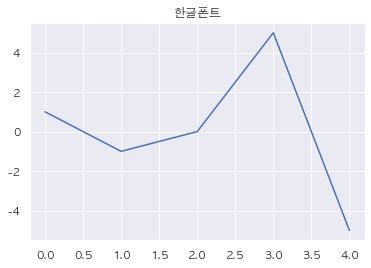

In [159]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

## violin plot
- 하얀 점 : 중앙값(Median)
- 박스 윗라인 : Q1(1사분위수)
- 박스 아래라인 : Q3(3사분위수)를 뜻하고
- Min과 Max값
- [출처] [python]파이썬으로 Violinplot , 바이올린플롯 그리기 연습|작성자 hello world



1. 도시별 공원면적의 분포 (violin plot)
-> 부산이 분포가 좀더 퍼져 있음 (중앙값은 비숫), 최대값은 서울이 큼

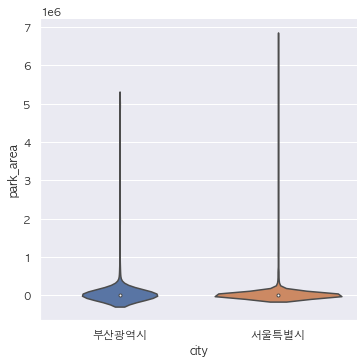

In [160]:
sns.catplot(x="city", y="park_area", data=park, kind='violin')

2. 도시별 집값 실거래가 (violin plot)
-> 서울이 분포가 좀더 고르게 퍼져있으며, 중앙값이 좀더 높음, 최대값은 서울이 큼

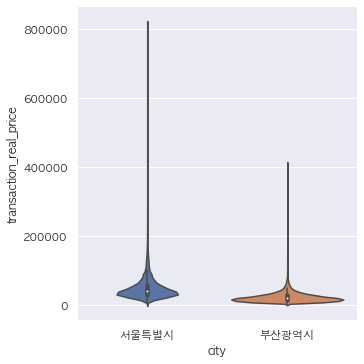

In [161]:
sns.catplot(x="city", y="transaction_real_price", data=train, kind='violin')

- 층수별 집값 실거래가를 city에 따라 시각화 (violin plot)
-> 서울이 보통 분포가 넓으며, 최대값이 큼. & 70~ 80층은 부산 데이터만 존재 => 제거 가능 ?

In [162]:
train['floor'] = train['floor']//10

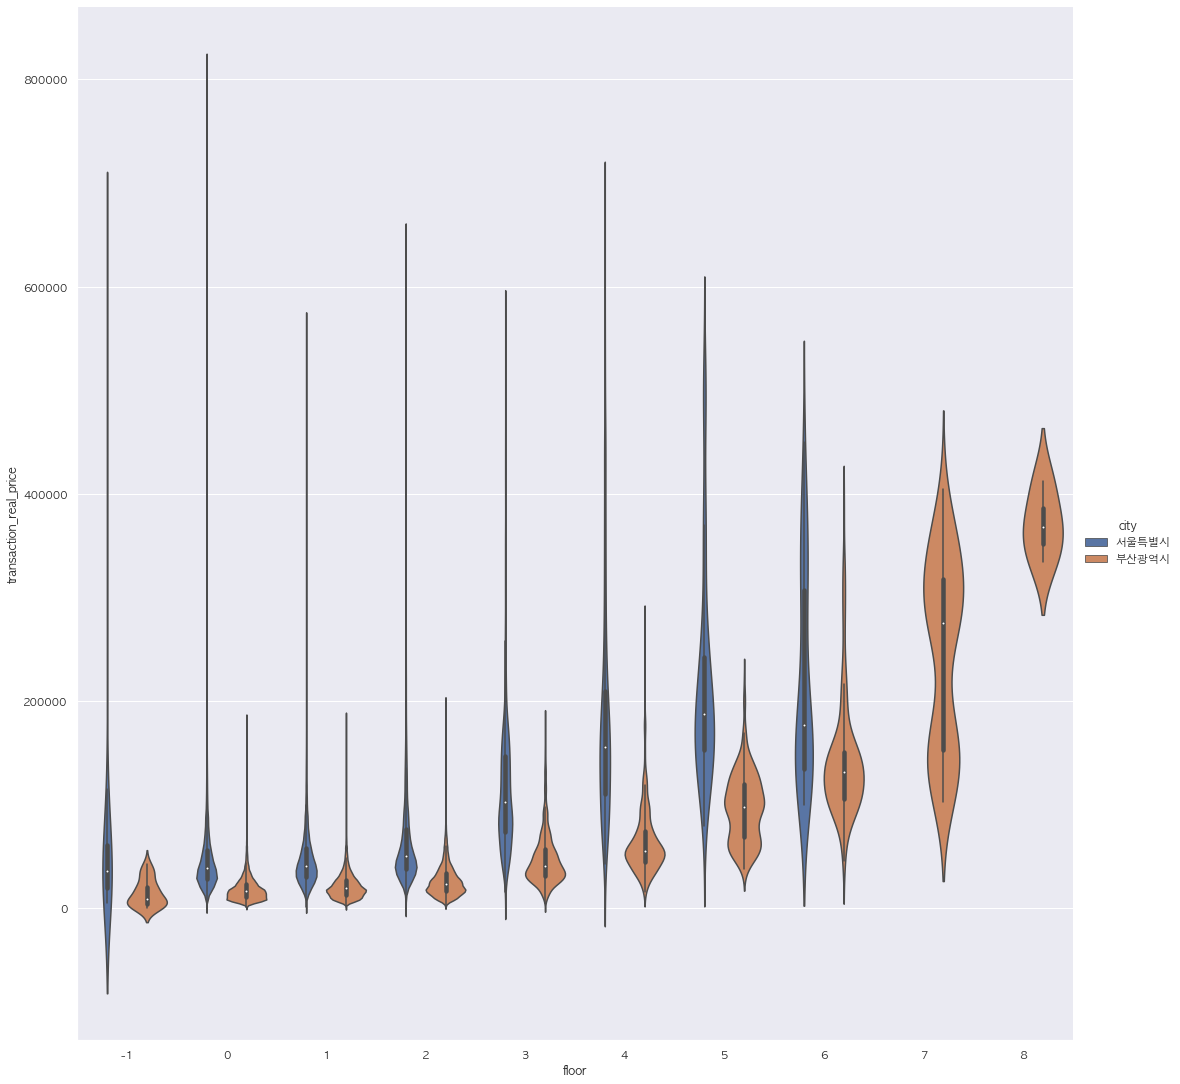

In [163]:
sns.catplot(x="floor", y="transaction_real_price", hue="city",data=train, kind='violin', size = 15)

## strip plot

- 도시별 설립연도(1960년대 ~ 2010년대) 에 따른 집값 실거래가 분포

In [168]:
train['year_of_completion'] = train['year_of_completion']//10

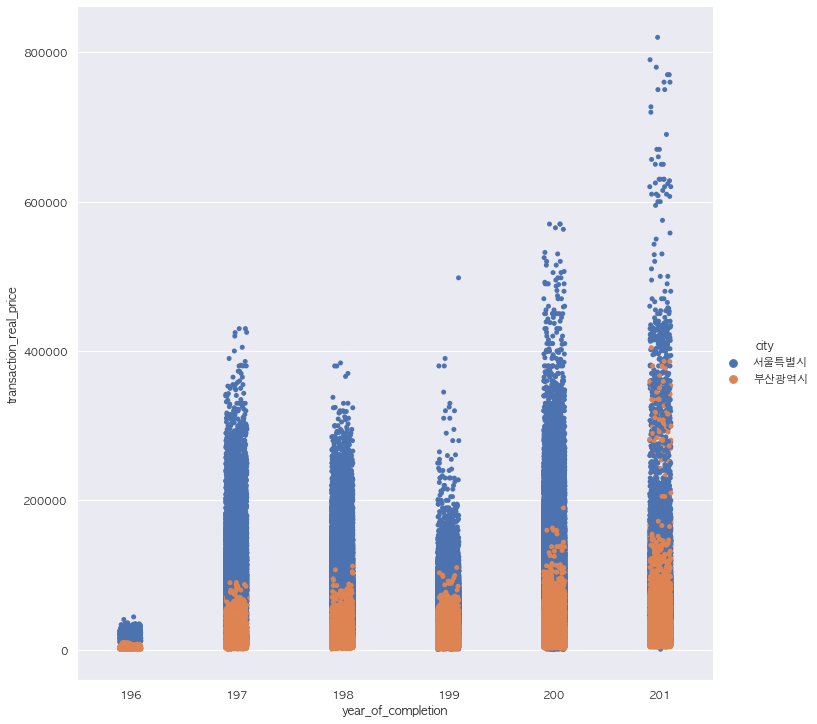

In [174]:
sns.catplot(x="year_of_completion", y="transaction_real_price", hue="city",data=train, jitter=True, size = 10)
# jitter=True -> 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 함.

## swarm plot
- 범주형 변수와 수치형 변수 간의 관계